## Домашнее задание по лекции 7

In [354]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [260]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [286]:
def f_chose(x, y):
    factor = x.columns
    ones = np.ones((x.shape[0], 1))
    x = np.column_stack((ones, x))
    XTX = x.T.dot(x)
    det = np.linalg.det(XTX)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(x.T).dot(y)
    z = x.dot(b)
    e = y - z
    ae = e.mean()
#     print('average error = ', float(ae))
    R = 1 - sum_of_squares(e) / sum_of_squares(y)
#     print('R =', float(R))
    z.var(), y.var()
    n = x.shape[0]
    m = 1
    k1 = m
    k2 = n - m - 1
    k1, k2
    alpha = 0.05
    t = stats.f.ppf(1 - alpha, k1, k2)
#     print('quantile =', t)
    F = (R / k1) / ((1 - R) / k2)
#     print('statistic=', float(F))
    significancy = ''
    if float(F) > float(t):
        significancy = 'уравнение регрессии признаётся значимым'
    else:
        significancy = 'уравнение регрессии НЕ признаётся значимым'
       
    info = {'factor': factor, 'determ': det, 'average error': float(ae), 'R': float(R), 'statistic':float(F), 'significancy': significancy}
    return info

In [262]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [263]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [287]:
a = [(0,1), (0,2), (0,3), (1, 2), (1,3), (2,3)]
r2 = 0
f1 = 0
f2 = 0
info = []
for item in a:
    i, j = item[0], item[1]
    df = X[[i, j]]
    res = f_chose(df,y)
    info.append(f_chose(df,y))
    r2_item = res.get('R')
    if r2_item > r2:
        r2 = r2_item
        f1 = i
        f2 = j  
df = pd.DataFrame(info)
print(f'R2 = {r2}, выбрались {i}й и {j}й столбцы')
df

R2 = 0.7634246238793152, выбрались 2й и 3й столбцы


,factor,determ,average error,R,statistic,significancy
0,"Int64Index([0, 1], dtype='int64')",349.778203,2.042810e-15,0.181136,1.769631,уравнение регрессии НЕ признаётся значимым
1,"Int64Index([0, 2], dtype='int64')",2835.360023,-2.575717e-15,0.763425,25.815861,уравнение регрессии признаётся значимым
2,"Int64Index([0, 3], dtype='int64')",1689.212474,8.082424e-15,0.453297,6.633165,уравнение регрессии признаётся значимым
3,"Int64Index([1, 2], dtype='int64')",1427.812578,-2.229328e-14,0.547948,9.697090,уравнение регрессии признаётся значимым
4,"Int64Index([1, 3], dtype='int64')",701.732736,2.158274e-14,0.606206,12.315168,уравнение регрессии признаётся значимым
5,"Int64Index([2, 3], dtype='int64')",4547.328075,-1.314504e-14,0.622442,13.188797,уравнение регрессии признаётся значимым


In [266]:
print(pd.DataFrame(info))

   factor       determ  average error         R  \
0       1   349.778203   2.042810e-15  0.181136   
1       1  2835.360023  -2.575717e-15  0.763425   
2       1  1689.212474   8.082424e-15  0.453297   
3       2  1427.812578  -2.229328e-14  0.547948   
4       2   701.732736   2.158274e-14  0.606206   
5       3  4547.328075  -1.314504e-14  0.622442   

                                 significancy  
0  уравнение регрессии НЕ признаётся значимым  
1     уравнение регрессии признаётся значимым  
2     уравнение регрессии признаётся значимым  
3     уравнение регрессии признаётся значимым  
4     уравнение регрессии признаётся значимым  
5     уравнение регрессии признаётся значимым  


__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?

In [411]:
A = np.zeros(2509)
A[np.arange(77)] = 1
B = np.zeros(1465)
B[np.arange(60)] = 1
AB = np.concatenate([A,B])
n1 = 2509
n2 = 1465
A_mean = A.mean()
B_mean = B.mean()
AB_mean = AB.mean()
A_mean, B_mean, AB_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

In [412]:
SS_b = n1 * (A_mean - AB_mean) ** 2 + n2 * (B_mean - AB_mean) ** 2 

SS_w = ((A - A_mean) ** 2).sum() + ((B - B_mean) ** 2).sum() 

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

In [413]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

In [414]:
F = sigma2_b / sigma2_w
F

2.9293243889013496

In [415]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

Значение статистики не попало в критическую область следовательно отличие конверсии не являетмя значимым

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [288]:
data = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [289]:
enscomb = pd.DataFrame(data)

In [300]:
enscomb

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [416]:
for i in enscomb.columns:
    col = i
    print(f' {col} - выборочное среднее {enscomb[col].mean()}, дисперсия {enscomb[col].var()}')

 x1 - выборочное среднее 9.0, дисперсия 11.0
 y1 - выборочное среднее 7.500909090909093, дисперсия 4.127269090909091
 x2 - выборочное среднее 9.0, дисперсия 11.0
 y2 - выборочное среднее 7.50090909090909, дисперсия 4.127629090909091
 x3 - выборочное среднее 9.0, дисперсия 11.0
 y3 - выборочное среднее 7.5, дисперсия 4.12262
 x4 - выборочное среднее 9.0, дисперсия 11.0
 y4 - выборочное среднее 7.500909090909091, дисперсия 4.123249090909091


In [406]:
def splt(x, y):
    fig, ax = plt.subplots(ncols=1)
    fig.set_size_inches(4, 4)
    ox = x
    oy = b0 + b1 * ox
    ax.scatter(x, y)
    ax.plot(ox, oy, color='red', alpha=0.5)

Kpirsn(x1, y1) - 0.81642051634484
Kpirsn(x2, y2) - 0.8162365060002428
Kpirsn(x3, y3) - 0.8162867394895984
Kpirsn(x4, y4) - 0.8165214368885028


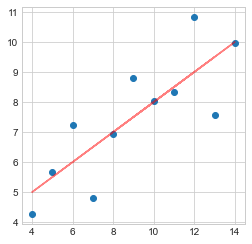

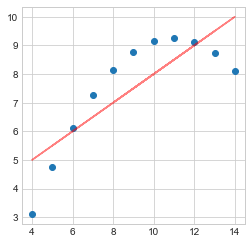

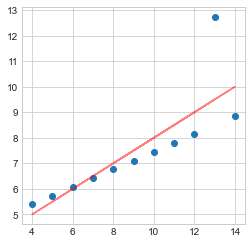

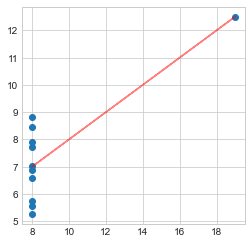

In [407]:
for i in range(0,len(enscomb.columns),2):
    col_x= enscomb.columns[i]
    col_y= enscomb.columns[i+1]
    x = enscomb[col_x]
    y = enscomb[col_y]
    print(f'Kpirsn({col_x}, {col_y}) - {np.corrcoef(x, y)[0,1]}')
    splt(x,y)